In [118]:
import matplotlib.pyplot as plt
import numpy as np
import re


In [119]:
def read_log(fname):
    txt = None
    with open(fname,"r") as fp:
        txt = fp.read()
    patten = re.compile(r"Train_acc : (.*?),")
    train_acc = re.findall(patten,txt)
    train_acc = [float(i) for i in train_acc]
    return train_acc


inceptionv3:42
inceptionv3_pre:28
resinceptionv3_pre:25
sa_inceptionv3_pre:36
sa_resinceptionv3_pre:33


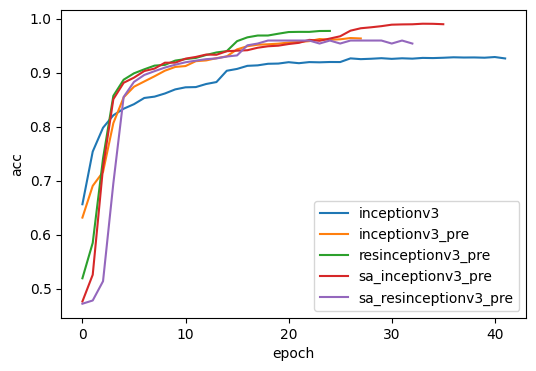

In [120]:
name_l = ["inceptionv3","inceptionv3_pre","resinceptionv3_pre","sa_inceptionv3_pre","sa_resinceptionv3_pre"]


plt.figure(figsize=(6,4))
for n in name_l:
    train_acc = read_log(f"./log/{n}.log")
    x = [i for i in range(len(train_acc))]
    plt.plot(x,train_acc,label=n)
    print(f"{n}:{len(x)}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()


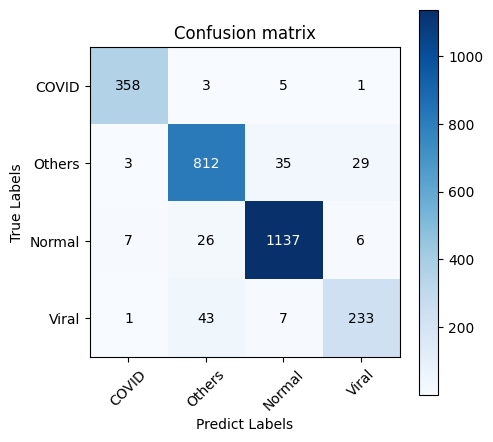

In [121]:
confusion = np.array([[358,3,5,1],
                      [3,812,35,29],
                      [7,26,1137,6],
                      [1,43,7,233]])

# 显示图像
plt.figure(figsize=(5,5))
plt.imshow(confusion,cmap=plt.cm.Blues)
plt.colorbar()
indices = range(len(confusion))
classes = ["COVID","Others","Normal","Viral"]
plt.xticks(indices,classes,rotation=45)
plt.yticks(indices,classes)
plt.xlabel("Predict Labels")
plt.ylabel("True Labels")
plt.title("Confusion matrix",fontsize=12)

# 显示数据
thresh = confusion.max()/2.
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        plt.text(j,i,format(confusion[i][j],"d"),
        fontsize=10,  # 矩阵字体大小
        horizontalalignment="center",  # 水平居中。
        verticalalignment="center",  # 垂直居中。
        color="white" if confusion[i, j] > thresh else "black")


plt.show()


